Importing libaries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading Model

In [ ]:
cnn = tf.keras.models.load_model('/content/trained_model.h5')

visualization and preforming prediction on single image

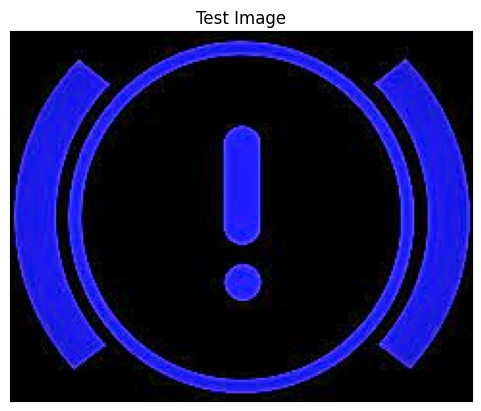

In [ ]:
import cv2
image_path = "/content/drive/MyDrive/Dashboard_indicator/Testing/Brake Warning Light/b1.jpg"
img = cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

Testing model

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) # Converting single image to batch
prediction = cnn.predict(input_arr)


1/1 [==============================] - 1s 682ms/step


In [ ]:
print(prediction[0])
print(max(prediction[0]))

[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 6.920022e-35
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]
1.0


In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Dashboard_indicator/Testing',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode='rgb',
    batch_size =32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split= None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 55 files belonging to 29 classes.


In [ ]:
#test_set.class_names

In [ ]:
result_index = np.where(prediction[0] == max(prediction[0]))
print(result_index[0][0])

6


Dispay image

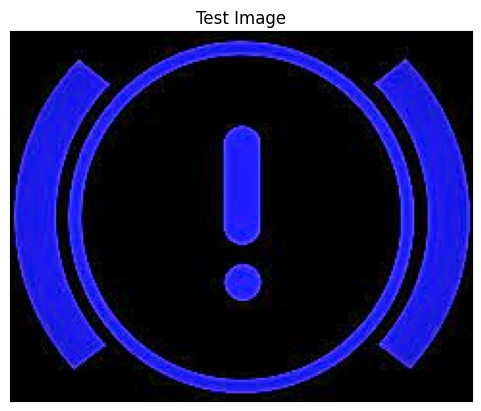

In [ ]:
import cv2
image_path = "/content/drive/MyDrive/Dashboard_indicator/Testing/Brake Warning Light/b1.jpg"
img = cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
print("It is a {}".format(test_set.class_names[result_index[0][0]]))

It is a Brake Warning Light
